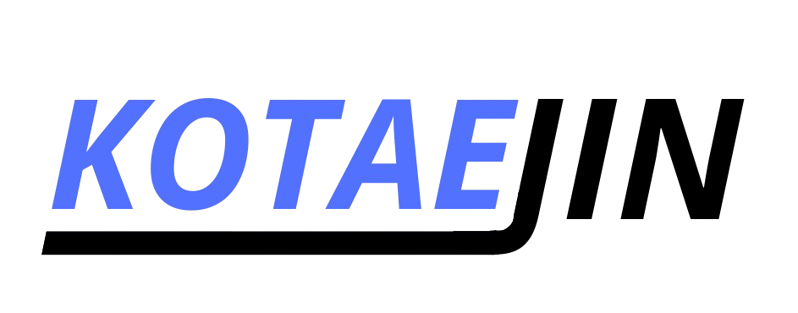

# Sumário

- Descrição do problema
 - Perguntas para serem respondidas utilizando a análise exploratória
- Instruções para treinamento do modelo com CPU e GPU
 - Instruções CPU
 - Instruções GPU
- Configurações iniciais
 - Instalando Bibliotecas
 - Realização dos imports
 - Conectando ao google drive
 - Definição de caminhos para a base
- Análise exploratória
 - Definição de funções para a análise exploratória
 - Principais dúvidas do chat
 - Palavras que são mais escritas incorretamente
 - Gírias mais utilizadas pelos clientes
 - Pontuações mais frequentes nas perguntas
 - Bigramas mais frequentes nas respostas ao cliente
- Definição de funções de etapas de pré-processamento
 - Lendo base de dados
 - Treinando tagger floresta
 - Definindo funções para o pré-processamento
 - Testes das funções de pré-processamento
- Uso de Pipeline de pré-processamento
 - Definição da Pipeline
 - Lendo perguntas da base de dados para realização de testes
 - Execução da pipeline
 - Exibição de resultados obtidos
 - Testes de validação de Pipeline
- Word2Vec
- Treinamento do modelo
 - Preparando Modelo
- Apresentação da matriz de confusão
 - Descrição e Análise
 - Métricas Escolhidas Para Avaliar a Qualidade do Modelo
 - Análise Treinamento GPU x CPU

# Descrição do problema

Atualmente, o Serviço de Atendimento ao Cliente (SAC) enfrenta uma alta demanda, com mais de 25 mil atendimentos mensais via chat online (Live Chat) em diversos idiomas. Esta carga de trabalho supera a capacidade de resposta dos atendentes humanos, resultando em atrasos no atendimento e insatisfação dos clientes.

Para enfrentar este desafio, será desenvolvido um chatbot baseado em modelos abertos de IA Generativa, destinado ao atendimento de clientes. Este chatbot será controlado por um grupo de usuários internos, permitindo a criação, operação e personalização contínua. Durante o projeto, um desenvolvedor da Brastel, no Brasil, será alocado para auxiliar no desenvolvimento, garantindo que os protótipos possam ser eficazmente utilizados na criação do sistema final completo.

### Perguntas para serem respondidas utilizando a análise exploratória

- Em qual período do dia o chat recebe mais acessos?
- Quais são as dúvidas mais perguntadas pelos usuários?
- Qual a proporção de palavras recorrentes escritas de maneira errada?
- As mensagens costumam ter muitas gírias ou abreviações?
- O uso de pontuação é algo comum nas mensagens?
- As respostas seguem algum padrão em alguma parte delas?

# Instruções para treinamento do modelo com CPU e GPU

## Instruções CPU

## Instruções GPU

#Configurações Iniciais

## Instalando Bibliotecas

In [5]:
!pip uninstall pyspellchecker -y
!pip install pyspellchecker
!python -m spacy download pt_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 113.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Realização dos imports

In [6]:
import spacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import floresta
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import RSLPStemmer
from collections import defaultdict
import re
import pandas as pd
from IPython.display import display
from nltk.tag import UnigramTagger
import string
import matplotlib.pyplot as plt
from collections import Counter
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import gensim
import numpy as np
from keras.models import Sequential
import seaborn as sns
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import unicodedata

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('rslp')
nlp = spacy.load("pt_core_news_sm")
nltk.download('floresta')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Unzipping corpora/floresta.zip.


True

## Conectando ao google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Definição de caminhos para a base

In [8]:

DEFAULT_XLS_PATH = "/content/drive/MyDrive/m11/data/chat_clients.xlsx"
DEFAULT_CSV_PATH = "/content/drive/MyDrive/m11/data/data.csv"

def get_file_paths():
    xls_path = input(f"Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padrão): ")
    xls_path = xls_path if xls_path.strip() else DEFAULT_XLS_PATH

    csv_path = input(f"Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padrão): ")
    csv_path = csv_path if csv_path.strip() else DEFAULT_CSV_PATH

    return xls_path, csv_path

XLS_PATH, CSV_PATH = get_file_paths()

Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padrão): 
Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padrão): 


Nesta etapa, o colab é preparado com a instalação e importação de bibliotecas e pacotes necessários para a execução do projeto.

#Análise exploratória

## Definição de funções para a análise exploratória

In [ ]:
def remocao_stopword(text):
    stop_words = set(stopwords.words('portuguese'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def conversao_minuscula(text):
    try:
        text = text.lower()
    except:
        pass
    return text

def encontrar_erros(texto):
    spell = SpellChecker(language='pt')
    palavras = texto.split()
    palavras_erradas = spell.unknown(palavras)
    return palavras_erradas

def limpar_sentenca(sentence: str) -> str:
    cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    return cleaned_sentence

def verificar_giras_abreviacoes(texto, giras_abreviacoes):
    palavras = texto.lower().split()
    giras_encontradas = [palavra for palavra in palavras if palavra in giras_abreviacoes]
    return giras_encontradas

def contar_pontuacoes(texto):
    pontuacoes = re.findall(r'[^\w\s]', texto)
    return pontuacoes

def encontrar_bigramas(texto):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform([texto])
    bigramas = vectorizer.get_feature_names_out()
    frequencias = bag_of_words.toarray().sum(axis=0)
    return dict(zip(bigramas, frequencias))

In [ ]:
df_filtrado = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]
df_filtrado.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)

df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(limpar_sentenca)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(remocao_stopword)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(conversao_minuscula)
df_filtrado['Intencao'] = df_filtrado['Intencao'].apply(conversao_minuscula)
df_filtrado['Resposta'] = df_filtrado['Resposta'].apply(conversao_minuscula)


df_filtrado

,Intencao,Pergunta,Resposta
0,como depositar,boa diatudo bemeu gostaria saber sobre caixa f...,"bom dia! sim, o sr pode utilizar o cartão de d..."
1,como fazer remessa,como enviar dinheiro japo,"para se inscrever no serviço de remessa, por f..."
2,tempo de remessa,quanto tempo levar beneficirio receber dinheiro,"via de regra, as remessas serão pagas via pix ..."
3,"pedido de envio via metodo ""byphone""",boa tarde acabei fazer transferncia 2223 total...,iremos processar a sua solicitacao.\nmuito obr...
4,"pedido de envio via metodo ""byphone""",poderia fazer remessa 22yenes bbb rrr obrigado...,iremos processar a sua solicitacao.\nmuito obr...
...,...,...,...
500,atualizacao de dados cadastrais,boa tarde fao fazer mudana endereo,a senhora pode trocar pelo próprio app da bras...
501,tempo de entrega do cartao,bom dia consegui fazer depsito carto ainda che...,boa noite\no sr solicitou dia 28. será entregu...
502,cancelamento,boa noitea beneficiria avisou conta est errado...,"sim, podemos cancelar\no valor voltará no seu ..."
503,reembolso,boa noite eu fiz depsito errado pra depositar ...,é possível solicitar o reembolso diretamente d...


## Principais dúvidas do chat

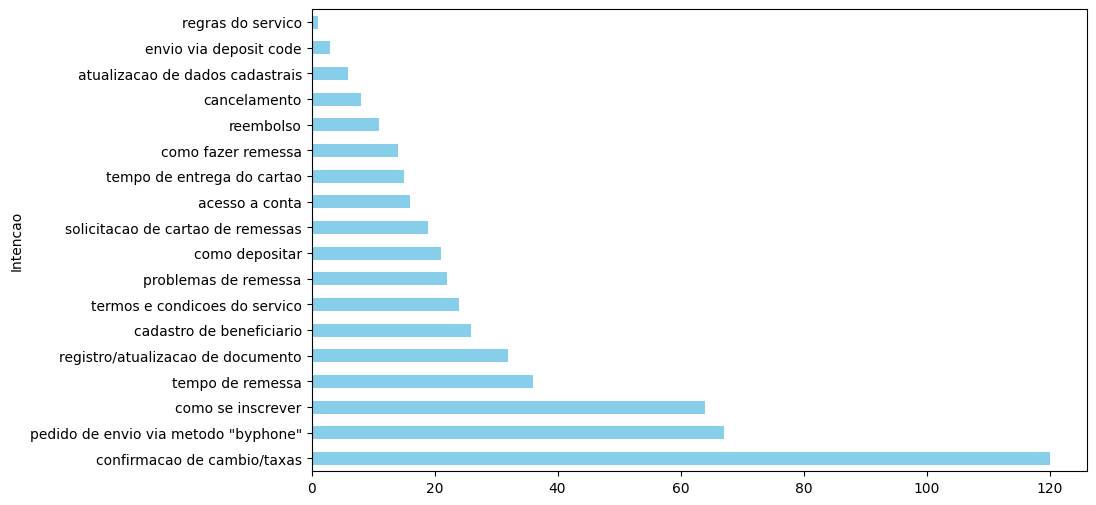

In [ ]:
contagem = df_filtrado['Intencao'].value_counts()
plt.figure(figsize=(10, 6))
contagem.plot(kind='barh', color='skyblue')

plt.show()

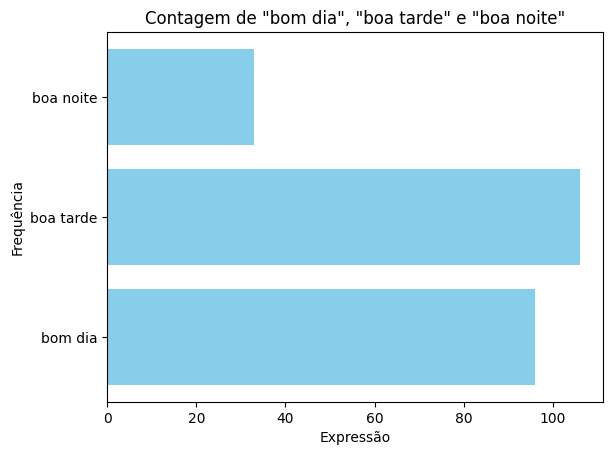

In [ ]:
data = {
    'mensagens': [
        'bom dia',
        'boa tarde',
        'boa noite'
    ]
}

df = pd.DataFrame(data)

contagem = {
    'bom dia': df_filtrado['Pergunta'].str.contains('bom dia', case=False).sum(),
    'boa tarde': df_filtrado['Pergunta'].str.contains('boa tarde', case=False).sum(),
    'boa noite': df_filtrado['Pergunta'].str.contains('boa noite', case=False).sum()
}

plt.barh(list(contagem.keys()), list(contagem.values()), color=['skyblue'])
plt.xlabel('Expressão')
plt.ylabel('Frequência')
plt.title('Contagem de "bom dia", "boa tarde" e "boa noite"')
plt.show()

## Palavras que são mais escritas incorretamente

In [ ]:
spell = SpellChecker(language='pt')
stop_words = set(stopwords.words('portuguese'))


def preprocessar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

def encontrar_erros(texto):
    texto = preprocessar_texto(texto)
    palavras = texto.split()
    erros = [palavra for palavra in palavras if palavra not in stop_words and palavra not in spell]
    return erros

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

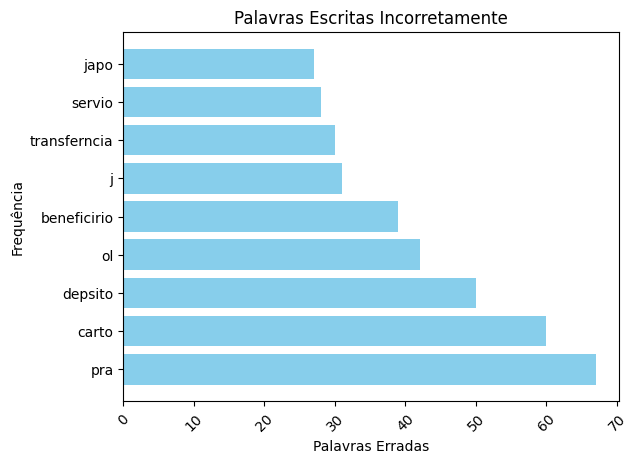

In [ ]:
df_filtrado['erros'] = df_filtrado['Pergunta'].apply(lambda x: encontrar_erros(x))
todos_erros = [erro for sublist in df_filtrado['erros'] for erro in sublist]
contagem_erros = Counter(todos_erros)
top_erros = contagem_erros.most_common(10)[1:]
palavras, frequencias = zip(*top_erros)
plt.barh(list(palavras), list(frequencias), color='skyblue')
plt.xlabel('Palavras Erradas')
plt.ylabel('Frequência')
plt.title('Palavras Escritas Incorretamente')
plt.xticks(rotation=45)

## Gírias mais utilizadas pelos clientes

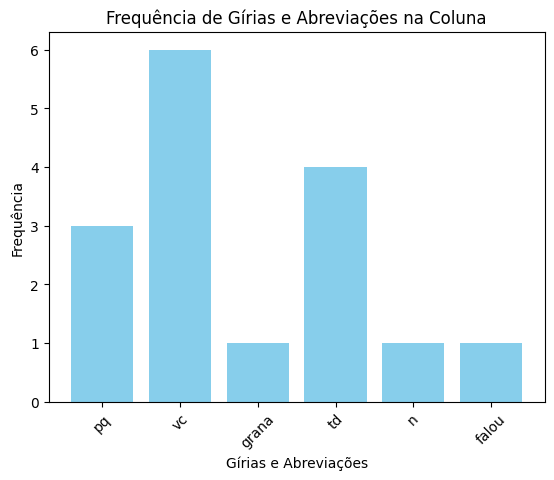

In [ ]:
giras_abreviacoes = [
    "rolê", "zoar", "dahora", "massa", "mano", "man", "bicho", "treta", "falou",
    "sussa", "balada", "perifa", "bagulho", "cabuloso", "grana", "leco",
    "vc", "tb", "blz", "qnd", "pq", "ctz", "fds", "tbm", "mt", "flw", "n",
    "td", "tlg", "tá", "lol", "brb", "omg", "btw", "asap"
]

df_filtrado['giras_encontradas'] = df_filtrado['Pergunta'].apply(lambda x: verificar_giras_abreviacoes(x, giras_abreviacoes))

todos_giras = [giria for sublist in df_filtrado['giras_encontradas'] for giria in sublist]
contagem_giras = Counter(todos_giras)

plt.bar(contagem_giras.keys(), contagem_giras.values(), color='skyblue')
plt.xlabel('Gírias e Abreviações')
plt.ylabel('Frequência')
plt.title('Frequência de Gírias e Abreviações na Coluna')
plt.xticks(rotation=45)
plt.show()

## Pontuações mais frequentes nas perguntas

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


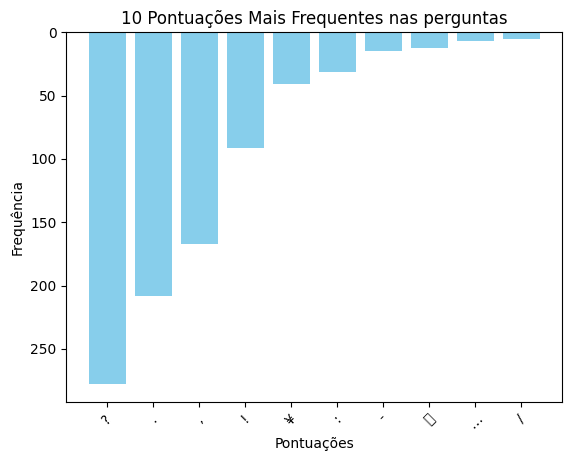

In [ ]:
df = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]

df['pontuacoes'] = df['Pergunta'].apply(contar_pontuacoes)

todas_pontuacoes = [ponto for sublist in df['pontuacoes'] for ponto in sublist]
contagem_pontuacoes = Counter(todas_pontuacoes)

top_10_pontuacoes = contagem_pontuacoes.most_common(10)

pontuacoes, frequencias = zip(*top_10_pontuacoes)

plt.bar(pontuacoes, frequencias, color='skyblue')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')
plt.title('10 Pontuações Mais Frequentes nas perguntas')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

## Bigramas mais frequentes nas respostas ao cliente

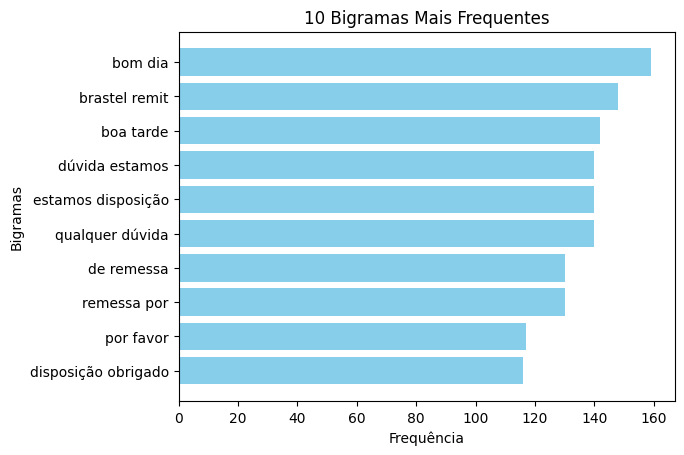

In [ ]:
df['Resposta\n'] = df['Resposta\n'].fillna('')

todos_bigramas = Counter()
for texto in df['Resposta\n']:
    try:
        bigramas = encontrar_bigramas(texto)
        todos_bigramas.update(bigramas)
    except:
        pass

top_10_bigramas = todos_bigramas.most_common(10)

bigramas, frequencias = zip(*top_10_bigramas)

plt.barh(bigramas, frequencias, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigramas')
plt.title('10 Bigramas Mais Frequentes')
plt.gca().invert_yaxis()
plt.show()

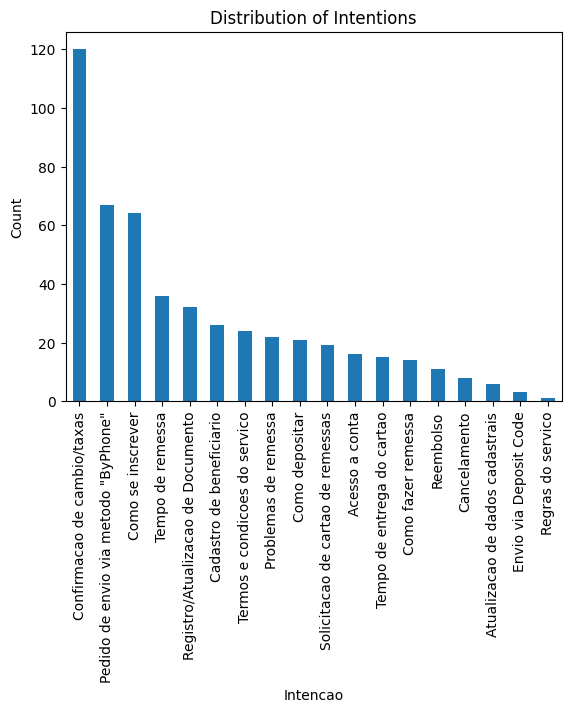

In [ ]:
import matplotlib.pyplot as plt

df['Intencao'].value_counts().plot(kind='bar')
plt.xlabel('Intencao')
plt.ylabel('Count')
_ = plt.title('Distribution of Intentions')

#Definição de funções de etapas de pré-processamento

## lendo base de dados

In [9]:
file_path = CSV_PATH

headers = ["numero", "intencao", "pergunta", "resposta"]

csv_words = pd.read_csv(file_path, sep=";")

csv_words.shape

(981, 24)

In [10]:
csv_words.dropna(axis=1, how="all", inplace=True)
csv_words.dropna(axis=0, how="all", inplace=True)

csv_words.shape

(505, 4)

In [11]:
csv_words = csv_words.apply(lambda x: x.str.replace("\n", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\t", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\r", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\f", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\v", " ", regex=False) if x.dtype == "object" else x)

In [12]:
csv_words.head()

,No,Intencao,Pergunta,Resposta\n
0,1.0,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,2.0,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
2,3.0,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
3,4.0,"Pedido de envio via metodo ""ByPhone""",Boa tarde Acabei de fazer a transferência de 2...,iremos processar a sua solicitacao. Muito obri...
4,5.0,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao. Muito obri...


## Treinando tagger floresta

In [13]:
train_data = floresta.tagged_sents()
unigram_tagger = UnigramTagger(train_data)

## Definindo funções para o pré-processamento

In [14]:
def segmentar(texto):
    return sent_tokenize(texto, language='portuguese')

def tokenizar(texto):
    return word_tokenize(texto, language='portuguese')

def lematizar(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def stemming(tokens):
    stemmer = RSLPStemmer()
    stems = [stemmer.stem(token) for token in tokens]
    return stems

def remover_stopwords(tokens):
    stop_words = set(stopwords.words("portuguese"))
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return filtered_text

def pos_tagging(tokens):
    return unigram_tagger.tag(tokens)

def remover_pontuacao_e_acentos(input_data):
    def remover_acentos(texto):
        return ''.join(
            char for char in unicodedata.normalize('NFD', texto)
            if unicodedata.category(char) != 'Mn'
        )

    pontuacoes_regex = r'[.,;:!?()\[\]{}\-_"\'“”‘’/\\|@#$%^&*~`=+]'

    if isinstance(input_data, list):
        tokens_sem_acentos = [remover_acentos(token) for token in input_data]

        tokens_sem_pontuacao = [
            re.sub(pontuacoes_regex, ' ', token)
            for token in tokens_sem_acentos
        ]

        tokens_processados = []
        for token in tokens_sem_pontuacao:
            tokens_processados.extend(token.split())

        tokens_finais = [token for token in tokens_processados if token.strip()]

        return tokens_finais

    elif isinstance(input_data, str):
        string_sem_acentos = remover_acentos(input_data)

        string_sem_pontuacao = re.sub(pontuacoes_regex, ' ', string_sem_acentos)

        return ' '.join(string_sem_pontuacao.split()).strip()

    else:
        raise ValueError("Input deve ser uma lista de tokens ou uma string.")

def reconhecimento_entidades_nomeadas(tokens):
    pos_tags = nltk.pos_tag(tokens)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    entities = []
    for subtree in named_entities:
        if isinstance(subtree, nltk.Tree):
            entity_name = " ".join([leaf[0] for leaf in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity_name, entity_type))
    return entities

## Testes das funções de pré-processamento

In [15]:
# Texto de exemplo
texto = "O Leandro comprou um carro novo. Ele está muito feliz com a nova aquisição!"

In [16]:
# Teste da função segmentar
resultado_esperado_segmentar = ['O Leandro comprou um carro novo.', 'Ele está muito feliz com a nova aquisição!']
resultado_obtido_segmentar = segmentar(texto)
assert resultado_obtido_segmentar == resultado_esperado_segmentar, f"Erro no teste de segmentação. Esperado: {resultado_esperado_segmentar}, Obtido: {resultado_obtido_segmentar}"
print("Teste de segmentação passou!")

Teste de segmentação passou!


In [17]:
# Teste da função tokenizar
resultado_esperado_tokenizar = ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.', 'Ele', 'está', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisição', '!']
resultado_obtido_tokenizar = tokenizar(texto)
assert resultado_obtido_tokenizar == resultado_esperado_tokenizar, f"Erro no teste de tokenização. Esperado: {resultado_esperado_tokenizar}, Obtido: {resultado_obtido_tokenizar}"
print("Teste de tokenização passou!")

Teste de tokenização passou!


In [18]:
# Teste da função lematizar
tokens_exemplo = ['Leandro', 'comprou', 'carros']
resultado_esperado_lematizar = ['Leandro', 'comprou', 'carros']
resultado_obtido_lematizar = lematizar(tokens_exemplo)
assert resultado_obtido_lematizar == resultado_esperado_lematizar, f"Erro no teste de lematização. Esperado: {resultado_esperado_lematizar}, Obtido: {resultado_obtido_lematizar}"
print("Teste de lematização passou!")

Teste de lematização passou!


In [19]:
# Teste da função stemming
resultado_esperado_stemming = ['leandr', 'compr', 'carr']
resultado_obtido_stemming = stemming(tokens_exemplo)
assert resultado_obtido_stemming == resultado_esperado_stemming, f"Erro no teste de stemming. Esperado: {resultado_esperado_stemming}, Obtido: {resultado_obtido_stemming}"
print("Teste de stemming passou!")

Teste de stemming passou!


In [20]:
# Teste da função remover_stopwords
resultado_esperado_remover_stopwords = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_stopwords = remover_stopwords(tokens_exemplo)
assert resultado_obtido_remover_stopwords == resultado_esperado_remover_stopwords, f"Erro no teste de remoção de stopwords. Esperado: {resultado_esperado_remover_stopwords}, Obtido: {resultado_obtido_remover_stopwords}"
print("Teste de remoção de stopwords passou!")

Teste de remoção de stopwords passou!


In [21]:
# Teste da função pos_tagging
resultado_esperado_pos_tagging = [('Leandro', 'N<+prop'), ('comprou', 'P+v-fin'), ('carros', 'H+n')]
resultado_obtido_pos_tagging = pos_tagging(tokens_exemplo)
assert resultado_obtido_pos_tagging == resultado_esperado_pos_tagging, f"Erro no teste de POS tagging. Esperado: {resultado_esperado_pos_tagging}, Obtido: {resultado_obtido_pos_tagging}"
print("Teste de POS tagging passou!")

Teste de POS tagging passou!


In [22]:
# Teste da função remover_pontuacao
tokens_com_pontuacao = ['Leandro', ',', 'comprou', 'carros', '.']
resultado_esperado_remover_pontuacao = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_pontuacao = remover_pontuacao_e_acentos(tokens_com_pontuacao)
assert resultado_obtido_remover_pontuacao == resultado_esperado_remover_pontuacao, f"Erro no teste de remoção de pontuação. Esperado: {resultado_esperado_remover_pontuacao}, Obtido: {resultado_obtido_remover_pontuacao}"
print("Teste de remoção de pontuação passou!")

Teste de remoção de pontuação passou!


In [23]:
# Teste da função reconhecimento_entidades_nomeadas
resultado_esperado_reconhecimento_entidades = [('Leandro', 'GPE')]
resultado_obtido_reconhecimento_entidades = reconhecimento_entidades_nomeadas(tokens_exemplo)
assert resultado_obtido_reconhecimento_entidades == resultado_esperado_reconhecimento_entidades, f"Erro no teste de reconhecimento de entidades nomeadas. Esperado: {resultado_esperado_reconhecimento_entidades}, Obtido: {resultado_obtido_reconhecimento_entidades}"
print("Teste de reconhecimento de entidades nomeadas passou!")

Teste de reconhecimento de entidades nomeadas passou!


#Uso de Pipeline de pré-processamento

## Definição da Pipeline

In [24]:
import random
from collections import Counter

def pipeline_preprocessamento(texto, aplicar_segmentacao=True, aplicar_tokenizacao=True, aplicar_lematizacao=True,
                              aplicar_stemming=False, aplicar_remocao_stopwords=True, aplicar_pos_tagging=True,
                              aplicar_reconhecimento_entidades=True, aplicar_remocao_pontuacao=True):
    if aplicar_segmentacao:
        sentencas = segmentar(texto)
    else:
        sentencas = [texto]

    all_tokens = []

    for sentenca in sentencas:
        if aplicar_tokenizacao:
            tokens = tokenizar(sentenca)

            if aplicar_remocao_pontuacao:
                print(f'Antes de remover pontuacao: {tokens}')
                tokens = remover_pontuacao_e_acentos(tokens)
                print(f'Depois de remover pontuacao: {tokens}')

            if aplicar_remocao_stopwords:
                tokens = remover_stopwords(tokens)
                print(f'Tokens após remoção de stopwords: {tokens}')

            if aplicar_lematizacao:
                tokens = lematizar(tokens)
                print(f'Tokens após lematização: {tokens}')

            if aplicar_stemming:
                tokens = stemming(tokens)
                print(f'Tokens após stemming: {tokens}')

            all_tokens.extend(tokens)

    bow_counter = Counter(all_tokens)

    used_random_numbers = set()

    resultados = []
    for sentenca in sentencas:
        print(f"Processing sentence: {sentenca}")

        output = {'Sentenca Original': sentenca}

        if aplicar_tokenizacao:
            tokens = tokenizar(sentenca)
            print(f"Tokens: {tokens}")

        if aplicar_remocao_pontuacao:
            tokens = remover_pontuacao_e_acentos(tokens)
            print(f"Tokens after Punctuation Removal: {tokens}")

        if aplicar_remocao_stopwords:
            tokens = remover_stopwords(tokens)
            print(f"Tokens after Stopword Removal: {tokens}")

        if aplicar_lematizacao:
            tokens = lematizar(tokens)
            print(f"Lemmatized Tokens: {tokens}")

        if aplicar_stemming:
            stemmed_tokens = stemming(tokens)
            print(f"Stemmed Tokens: {stemmed_tokens}")
        else:
            stemmed_tokens = tokens

        if aplicar_pos_tagging:
            pos_tags = pos_tagging(tokens)
            print(f"POS Tags: {pos_tags}")
            pos_tag_dict = {word: tag for word, tag in pos_tags}
        else:
            pos_tag_dict = {}

        if aplicar_reconhecimento_entidades:
            entidades = reconhecimento_entidades_nomeadas(tokens)
            print(f"Named Entities: {entidades}")
            named_entity_tokens = {entity[0] for entity in entidades}
        else:
            named_entity_tokens = set()

        sentence_counter = Counter(tokens)

        seen_tokens = set()
        combined_info = []
        for stem, token in zip(stemmed_tokens, tokens):
            if token not in seen_tokens:
                seen_tokens.add(token)
                is_named = token in named_entity_tokens
                pos = pos_tag_dict.get(token, "None")
                sentence_count = sentence_counter[token]

                random_number = random.randint(1, 1000)
                while random_number in used_random_numbers:
                    random_number = random.randint(1, 1000)
                used_random_numbers.add(random_number)

                combined_info.append([stem, is_named, pos, sentence_count, random_number])

        output['words'] = combined_info
        resultados.append(output)

        print("____________________________________________________________________________________________________")

    return resultados


## Lendo perguntas da base de dados para realização de testes

In [25]:
perguntas_concatenadas = ' '.join(csv_words['Pergunta'].dropna().astype(str))

perguntas_concatenadas = ' '.join(perguntas_concatenadas.split()[:1000])

print(perguntas_concatenadas)

Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado Como enviar dinheiro do Japão? Quanto tempo levará para o beneficiário receber o dinheiro? Boa tarde Acabei de fazer a transferência de 22+23, Total de 45Yenes Poderia fazer a remessa de 22yenes para o BBB RRR obrigado E de 23yenes para o AAAA MMMM VVVVV caixa econômica federal Obrigado Boa tarde Acabei de fazer uma transferência para conta de vocês no valor de 50.700 a ser descontado a taxa de vocês Boa tarde A beneficiária é YYY FFF YYY Como posso me inscrever no serviço de remessa? Boa noite gostaria de tirar uma dúvida???pq a cotação do dólar está 5,02 e no app está 4,96??? Bom dia! Hoje eu fiz um depósito! Acho que esqueci de digitar o código. Por favor Verifique pra mim. Fico no aguardo da confirmação! Obrigado Como posso me inscrever no serviço de remessa? Olá tudo bem, transferi um dinheiro do paypayginkou para essa conta mas não coloquei o

## Execução da pipeline

In [26]:
resultados = pipeline_preprocessamento(perguntas_concatenadas)

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

Antes de remover pontuacao: ['Boa', 'dia.tudo', 'bem', '?', 'eu', 'gostaria', 'de', 'saber', 'sobre', 'aquele', 'caixa', 'do', 'family', 'mart', 'verde', 'eh', '24', 'horas', '?', 'e', 'se', 'eu', 'posso', 'transferir', 'a', 'qualquer', 'hora', '?', 'obrigado', 'Como', 'enviar', 'dinheiro', 'do', 'Japão', '?']
Depois de remover pontuacao: ['Boa', 'dia', 'tudo', 'bem', 'eu', 'gostaria', 'de', 'saber', 'sobre', 'aquele', 'caixa', 'do', 'family', 'mart', 'verde', 'eh', '24', 'horas', 'e', 'se', 'eu', 'posso', 'transferir', 'a', 'qualquer', 'hora', 'obrigado', 'Como', 'enviar', 'dinheiro', 'do', 'Japao']
Tokens após remoção de stopwords: ['Boa', 'dia', 'tudo', 'bem', 'gostaria', 'saber', 'sobre', 'caixa', 'family', 'mart', 'verde', 'eh', '24', 'horas', 'posso', 'transferir', 'qualquer', 'hora', 'obrigado', 'enviar', 'dinheiro', 'Japao']
Tokens após lematização: ['Boa', 'dia', 'tudo', 'bem', 'gostaria', 'saber', 'sobre', 'caixa', 'family', 'mart', 'verde', 'eh', '24', 'horas', 'posso', 'tra

,Sentenca Original,words
0,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"[[Boa, True, H+adj, 1, 443], [dia, False, H+n,..."
1,Quanto tempo levará para o beneficiário recebe...,"[[Quanto, True, ADVL+pron-det, 1, 596], [tempo..."
2,Boa tarde Acabei de fazer a transferência de 2...,"[[Boa, True, H+adj, 3, 575], [tarde, False, H+..."
3,Boa noite gostaria de tirar uma dúvida??,"[[Boa, True, H+adj, 1, 316], [noite, False, H+..."
4,"?pq a cotação do dólar está 5,02 e no app está...","[[pq, False, None, 1, 802], [cotacao, False, N..."
5,Bom dia!,"[[Bom, True, >A+adj, 1, 981], [dia, False, H+n..."
6,Hoje eu fiz um depósito!,"[[Hoje, True, ADVL+adv, 1, 957], [fiz, False, ..."
7,Acho que esqueci de digitar o código.,"[[Acho, True, P+v-fin, 1, 720], [esqueci, Fals..."
8,Por favor Verifique pra mim.,"[[favor, False, H+n, 1, 811], [Verifique, True..."
9,Fico no aguardo da confirmação!,"[[Fico, True, None, 1, 428], [aguardo, False, ..."


## Exibição de resultados obtidos

In [27]:
resultados

[{'Sentenca Original': 'Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado Como enviar dinheiro do Japão?',
  'words': [['Boa', True, 'H+adj', 1, 443],
   ['dia', False, 'H+n', 1, 168],
   ['tudo', False, 'SUBJ+pron-indp', 1, 392],
   ['bem', False, 'ADVL+adv', 1, 712],
   ['gostaria', False, 'P+v-fin', 1, 151],
   ['saber', False, 'P+v-inf', 1, 707],
   ['sobre', False, 'H+prp', 1, 38],
   ['caixa', False, 'H+n', 1, 728],
   ['family', False, None, 1, 406],
   ['mart', False, None, 1, 498],
   ['verde', False, 'N<+adj', 1, 209],
   ['eh', False, None, 1, 272],
   ['24', False, '>N+num', 1, 570],
   ['horas', False, 'H+n', 1, 284],
   ['posso', False, 'AUX+v-fin', 1, 953],
   ['transferir', False, 'P+v-inf', 1, 884],
   ['qualquer', False, '>N+pron-det', 1, 917],
   ['hora', False, 'H+n', 1, 9],
   ['obrigado', False, 'P+v-pcp', 1, 365],
   ['enviar', False, 'P+v-inf', 1, 317],
   ['dinheiro', Fals

In [28]:
for resultado in resultados:
    print(f"Sentence: {resultado['Sentenca Original']}")
    print("Words:")
    for word_info in resultado['words']:
        print(word_info)
    print("____________________________________________________________________________________________________")

Sentence: Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado Como enviar dinheiro do Japão?
Words:
['Boa', True, 'H+adj', 1, 443]
['dia', False, 'H+n', 1, 168]
['tudo', False, 'SUBJ+pron-indp', 1, 392]
['bem', False, 'ADVL+adv', 1, 712]
['gostaria', False, 'P+v-fin', 1, 151]
['saber', False, 'P+v-inf', 1, 707]
['sobre', False, 'H+prp', 1, 38]
['caixa', False, 'H+n', 1, 728]
['family', False, None, 1, 406]
['mart', False, None, 1, 498]
['verde', False, 'N<+adj', 1, 209]
['eh', False, None, 1, 272]
['24', False, '>N+num', 1, 570]
['horas', False, 'H+n', 1, 284]
['posso', False, 'AUX+v-fin', 1, 953]
['transferir', False, 'P+v-inf', 1, 884]
['qualquer', False, '>N+pron-det', 1, 917]
['hora', False, 'H+n', 1, 9]
['obrigado', False, 'P+v-pcp', 1, 365]
['enviar', False, 'P+v-inf', 1, 317]
['dinheiro', False, 'H+n', 1, 28]
['Japao', True, None, 1, 461]
______________________________________________________

In [29]:
data = []
for resultado in resultados:
    sentence = resultado['Sentenca Original']
    for word_info in resultado['words']:
        data.append({
            'Sentenca Original': sentence,
            'stemmed': word_info[0],
            'ent_nomeada': word_info[1],
            'pos_tagging': word_info[2],
            'ocorrencias': word_info[3],
            'id': word_info[4]
        })

df = pd.DataFrame(data)

display(df)

,Sentenca Original,stemmed,ent_nomeada,pos_tagging,ocorrencias,id
0,Boa dia.tudo bem?eu gostaria de saber sobre aq...,Boa,True,H+adj,1,443
1,Boa dia.tudo bem?eu gostaria de saber sobre aq...,dia,False,H+n,1,168
2,Boa dia.tudo bem?eu gostaria de saber sobre aq...,tudo,False,SUBJ+pron-indp,1,392
3,Boa dia.tudo bem?eu gostaria de saber sobre aq...,bem,False,ADVL+adv,1,712
4,Boa dia.tudo bem?eu gostaria de saber sobre aq...,gostaria,False,P+v-fin,1,151
...,...,...,...,...,...,...
629,Olá gostaria de saber mais sobre como enviar d...,sobre,False,H+prp,1,791
630,Olá gostaria de saber mais sobre como enviar d...,enviar,False,P+v-inf,1,550
631,Olá gostaria de saber mais sobre como enviar d...,dinheiro,False,H+n,1,265
632,Olá gostaria de saber mais sobre como enviar d...,Brasil,False,H+prop,1,796


## Testes de validação de Pipeline

In [30]:
def validate_word_info(word_info):
    """
    Este teste tem como objetivo realizar a validação dos arrays de resposta obtidos na pipe

    resultados esperados [String, Boolean, String, Int, Int]
    """
    if len(word_info) != 5:
        print(f"Tamanho de resposta errado: {word_info}")
        return False

    if not isinstance(word_info[0], str):
        print(f"Elemento de índice '0' deve ser do tipo 'String': {word_info}")
        return False

    if not isinstance(word_info[1], bool):
        print(f"Elemento de índice '1' deve ser do tipo 'Boolean': {word_info}")
        return False

    if not (word_info[2] is None or isinstance(word_info[2], str)):
        print(f"Elemento de índice '2' deve ser do tipo 'String: {word_info}")
        return False

    if not isinstance(word_info[3], int):
        print(f"Elemento de índice '3' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[4], int):
        print(f"Elemento de índice '4' deve ser do tipo 'Integer': {word_info}")
        return False

    return True

def validate_results(resultados):
    all_valid = True
    for resultado in resultados:
        for word_info in resultado['words']:
            if not validate_word_info(word_info):
                all_valid = False
    return all_valid

is_valid = validate_results(resultados)
print(f"Os arrays são válidos? {is_valid}")


Os arrays são válidos? True


In [31]:
def testar_pipeline():
    """
    Este teste tem como objetivo a comparação entre resultados obtidos e esperados na execução da pipeline.
    """

    INPUT = "O Leandro comprou um carro novo. Ele está muito feliz com a nova aquisição!"

    result_esperado = [
        # Sentença 1 "O Leandro comprou um carro novo."
        [
            ['leandr', False, 'N<+prop', 1, 123],
            ['compr', False, 'P+v-fin', 1, 456],
            ['carr', False, 'H+n', 1, 789],
            ['nov', False, '>N+adj', 1, 321]
        ],

        # Sentença 2 "Ele está muito feliz com a nova aquisição!"
        [
            ['feliz', False, 'SC+adj', 1, 654],
            ['nov', False, '>N+adj', 1, 987],
            ['aquis', False, 'H+n', 1, 321]
        ]
    ]

    result_obtido = pipeline_preprocessamento(INPUT)

    sucesso = True

    print("🤖 Iniciando testes de pipeline... 🤖")

    print("____________________________________________________________________________________________________")

    for s_idx in range(len(result_esperado)):
        for i in range(len(result_esperado[s_idx])):
            obtido = result_obtido[s_idx]['words'][i][0:-1]
            esperado = result_esperado[s_idx][i][0:-1]
            print(f"Comparando: obtido='{obtido}', esperado='{esperado}'")
            try:
                assert obtido == esperado
                print("✅")
            except AssertionError:
                print("❌")
                sucesso = False
            print("____________________________________________________________________________________________________")

    print("")
    if sucesso:
        print("👍 Todos os testes passaram!")
    else:
        print("👎 Teste falhou!")

testar_pipeline()


Antes de remover pontuacao: ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.']
Depois de remover pontuacao: ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo']
Tokens após remoção de stopwords: ['Leandro', 'comprou', 'carro', 'novo']
Tokens após lematização: ['Leandro', 'comprou', 'carro', 'novo']
Antes de remover pontuacao: ['Ele', 'está', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisição', '!']
Depois de remover pontuacao: ['Ele', 'esta', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisicao']
Tokens após remoção de stopwords: ['feliz', 'nova', 'aquisicao']
Tokens após lematização: ['feliz', 'nova', 'aquisicao']
Processing sentence: O Leandro comprou um carro novo.
Tokens: ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.']
Tokens after Punctuation Removal: ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo']
Tokens after Stopword Removal: ['Leandro', 'comprou', 'carro', 'novo']
Lemmatized Tokens: ['Leandro', 'comprou', 'carro', 'novo']
POS Tags: [('Leandro', 'N<+prop'), ('comprou', 

# Word2Vec

In [32]:
def pipeline_word2vec(texto, aplicar_segmentacao=True, aplicar_tokenizacao=True, aplicar_lemmatizacao=True,
                      aplicar_remocao_pontuacao=True):
    if aplicar_segmentacao:
        sentencas = segmentar(texto)
    else:
        sentencas = [texto]

    processed_tokens = []

    for sentenca in sentencas:
        if aplicar_tokenizacao:
            tokens = tokenizar(sentenca)

            if aplicar_remocao_pontuacao:
                tokens = remover_pontuacao_e_acentos(tokens)

            if aplicar_lemmatizacao:
                tokens = lematizar(tokens)

            processed_tokens.append(tokens)

    return processed_tokens

In [35]:
dataset_texts = csv_words['Pergunta'].tolist()
dataset_labels = csv_words['Intencao'].tolist()

In [36]:
processed_texts = [pipeline_word2vec(text) for text in dataset_texts]

In [37]:
tokenized_texts = [tokens for sentence_tokens in processed_texts for tokens in sentence_tokens]

word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

In [38]:
from sklearn.preprocessing import LabelEncoder

def vectorize_text(text, word2vec_model):
    vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

X = []
valid_labels = []

min_length = min(len(tokenized_texts), len(dataset_labels))
tokenized_texts = tokenized_texts[:min_length]
dataset_labels = dataset_labels[:min_length]

X = np.array([vectorize_text(text, word2vec_model) for text in tokenized_texts])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset_labels)

print(X.shape)
print(y.shape)

(505, 100)
(505,)


### Testes Modelo Word2Vec

In [39]:
model = Word2Vec(vector_size=5)
model.build_vocab(corpus_iterable=[['ola', 'mundo'], ['isso', 'é', 'um', 'teste']])

### Testa se a função retorna um vetor com o tamanho correto quando todas as palavras estão no vocabulário do modelo Word2Vec

In [40]:
def test_vectorize_text_with_words():
    text = ['ola', 'mundo']
    vector = vectorize_text(text, model)
    assert vector.shape == (5,)

test_vectorize_text_with_words()

### Verifica se a função retorna um vetor de zeros quando a entrada é uma lista vazia

In [41]:
def test_vectorize_text_with_empty_input():
    text = []
    vector = vectorize_text(text, model)
    assert vector.shape == (5,)
    assert np.array_equal(vector, np.zeros(5))

test_vectorize_text_with_empty_input()

### Testa se a função retorna um vetor de zeros quando todas as palavras são desconhecidas (não estão no vocabulário)

In [42]:
def test_vectorize_text_with_unknown_words():
    text = ['desconhecida', 'palavra']
    vector = vectorize_text(text, model)
    assert vector.shape == (5,)
    assert np.array_equal(vector, np.zeros(5))

test_vectorize_text_with_unknown_words()

## Classificador Rede Neural

In [43]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

def train_neural_network(X_train, y_train, input_dim, n_classes, epochs=500, batch_size=64):
    model = Sequential()

    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

    model.fit(X_train, y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=0.2,
              callbacks=[checkpoint],
              verbose=1)

    return model

### Testes Classificador Rede Neural

### Testa se a função lida corretamente com entradas inválidas (neste caso, y_train com valores de ponto flutuante em vez de inteiros)

In [44]:
def test_train_neural_network_with_invalid_input():
    X_train = np.random.rand(100, 20)
    y_train = np.random.rand(100, 5)  # y_train deve ser números inteiros
    input_dim = 20
    n_classes = 5

    try:
        model = train_neural_network(X_train, y_train, input_dim, n_classes)
    except ValueError:
        assert True
    else:
        assert False, "Esperado um ValueError para inválido y_train"

test_train_neural_network_with_invalid_input()

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Este teste verifica se o modelo é treinado corretamente e se as métricas de desempenho (como a acurácia) são retornadas após o treinamento

In [45]:
def test_train_neural_network_accuracy():
    X_train = np.random.rand(100, 20)
    y_train = np.random.randint(0, 5, size=100)
    n_classes = 5

    model = train_neural_network(X_train, y_train, X_train.shape[1], n_classes, epochs=10, batch_size=10)

    loss, accuracy = model.evaluate(X_train, y_train, verbose=0)

    # verifica se a acurácia é maior que um valor esperado(10%)
    assert accuracy > 0.1, f"Espera-se acurácia maior do que 0.1, acurácia recebida: {accuracy}"

test_train_neural_network_accuracy()

Epoch 1/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.3000 - loss: 1.5834
Epoch 1: val_loss improved from inf to 1.61643, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.2143 - loss: 1.6462 - val_accuracy: 0.1000 - val_loss: 1.6164
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3000 - loss: 1.5387
Epoch 2: val_loss did not improve from 1.61643
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2452 - loss: 1.5618 - val_accuracy: 0.1500 - val_loss: 1.6334
Epoch 3/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4000 - loss: 1.6086
Epoch 3: val_loss did not improve from 1.61643
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2444 - loss: 1.6328 - val_accuracy: 0.1500 - val_loss: 1.6448
Epoch 4/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4000 - loss: 1.5807
Epoch 4: val_loss did not improve from 1.61643
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2587 - loss: 1.6186 - val_accuracy: 0.1500 - val_loss: 

In [46]:
n_classes = len(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if not isinstance(X_train, np.ndarray):
    X_train = np.array(X_train)

if np.isnan(X_train).any():
    X_train = np.nan_to_num(X_train)

model = train_neural_network(X_train, y_train, input_dim=X_train.shape[1], n_classes=n_classes)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.1314 - loss: 2.8654
Epoch 1: val_loss improved from inf to 2.82345, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 543ms/step - accuracy: 0.1317 - loss: 2.8650 - val_accuracy: 0.3086 - val_loss: 2.8235
Epoch 2/500
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0938 - loss: 2.8286
Epoch 2: val_loss improved from 2.82345 to 2.74796, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1597 - loss: 2.8135 - val_accuracy: 0.3086 - val_loss: 2.7480
Epoch 3/500
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2344 - loss: 2.7356
Epoch 3: val_loss improved from 2.74796 to 2.65894, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2222 - loss: 2.7353 - val_accuracy: 0.3086 - val_loss: 2.6589
Epoch 4/500
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2188 - loss: 2.7356
Epoch 4: val_loss improved from 2.65894 to 2.59592, saving model to b

# Matriz de confusão

Conforme o resultado de acurácia do modelo apresentado anteriormente, podemos concluir que o modelo apresenta um resultado abaixo do esperado. Há problemas significativos com confusões entre algumas classes, particularmente entre as classes 6, 7, 8, e 9. Isso indica que o modelo pode não estar capturando adequadamente as características distintivas entre essas classes, sendo necessário mais ajustes no treinamento ou na seleção de características realizada anteriormente.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


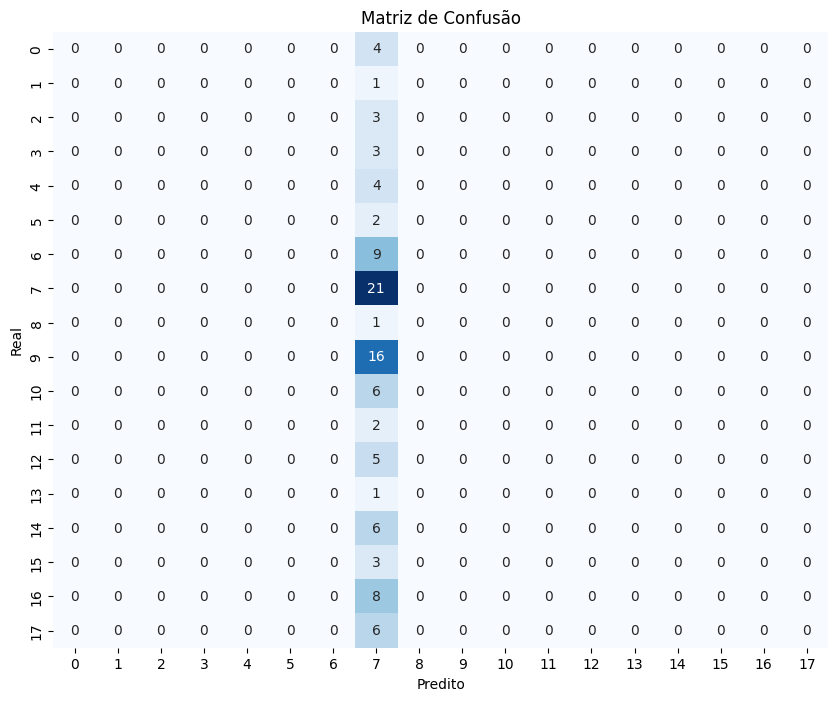

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, output_dict=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

### F1-Score

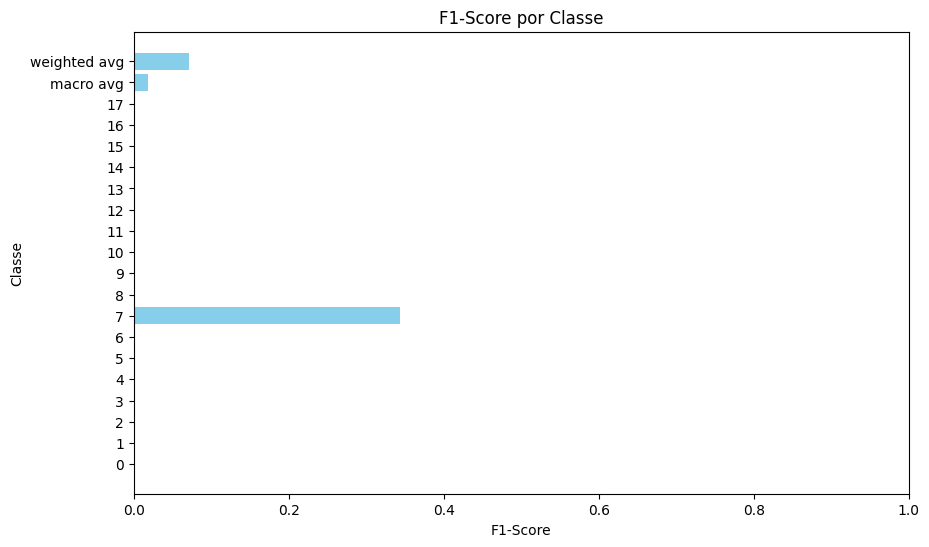

In [48]:
f1_scores = [v['f1-score'] for k, v in report.items() if k != 'accuracy']
classes = [k for k in report.keys() if k != 'accuracy']

plt.figure(figsize=(10, 6))
plt.barh(classes, f1_scores, color='skyblue')
plt.title('F1-Score por Classe')
plt.xlabel('F1-Score')
plt.ylabel('Classe')
plt.xlim(0, 1)
plt.show()

# Análise Treinamento GPU x CPU

### Treinamento com CPU

Por padrão, o Colab usará uma CPU. Podemos verificar isso executando o seguinte código:

In [49]:
import tensorflow as tf
print("Dispositivo:", tf.test.gpu_device_name())

Dispositivo: /device:GPU:0


### Treinamento com GPU

### Alterar Tipo de Ambiente de Execução:
1. Vá em "Ambiente de execução" > "Alterar tipo de ambiente de execução".

2. Selecione "GPU" como acelerador de hardware.

3. Execute o seguinte código para verificar se a GPU está disponível

In [50]:
import tensorflow as tf
print("Dispositivo:", tf.test.gpu_device_name())

Dispositivo: /device:GPU:0


### Treinamento do Modelo

Após realizar a configuração de CPU e GPU, basta rodar o seguinte código para treinar o modelo com alguma das alternativas

In [ ]:
model = train_neural_network(X_train, y_train, input_dim=X_train.shape[1], n_classes=n_classes)

### Comparação entre CPU e GPU

O treinamento em CPU é mais lento, especialmente para modelos grandes. Já o treinamento em GPU é muito mais rápido, pois as GPUs são projetadas para realizar cálculos paralelos, acelerando o aprendizado profundo.

O Google Colab fornece acesso a GPUs poderosas, como a Tesla K80, que podem acelerar significativamente o treinamento em comparação com CPUs.

Alternar entre CPU e GPU no Colab é fácil, basta selecionar o tipo de hardware na configuração do ambiente de execução. Isso torna o Colab acessível tanto para iniciantes quanto para profissionais.

Em resumo, para treinar modelos de aprendizado de máquina, especialmente redes neurais complexas, usar uma GPU no Google Colab é a opção mais rápida e eficiente. O Colab facilita esse processo, permitindo um foco maior no desenvolvimento do modelo sem se preocupar com a configuração do hardware.